In [1]:
require(ggplot2)

Loading required package: ggplot2


In [2]:
BASE.PATH <- './output/mult'

result_list <- list()

result <- NULL

for (d in list.files(BASE.PATH)) {
    
    if (grepl('GSE', d)) {
        
        path <- paste(BASE.PATH, d, 'inference', sep='/')
        
        i <- 1
        
        means <- list()
        
        values <- c()
        
        for (f in sort(list.files(path))) {
            
            if (grepl('valid', f)) {
                
                filename <- paste(path, f, sep='/')
                
                df <- read.table(filename, sep=',', header=T)
                
                colnames(df) <- c('dataset', 'y', 'y_hat')
                
                df$fold <- f
                df$dataset <- d
                
                if (is.null(result)) {
                    result <- df
                } else {
                    result <- rbind(result, df)
                }
            }
        }
    }
}

for (ddd in unique(result$dataset)) {
        
    df_ <- result[result$dataset == ddd,]

    df_$dataset <- NULL
    
    result_list[[ddd]][['MuLT']] <- df_
}

names(result_list)

[1] "GSE135820" "GSE68465"  "GSE94873"

In [3]:
BASE.PATH <- './output/smla'

for (m in list.files(BASE.PATH)) {

    if (grepl('_', m))
        next
    
    path_ <- paste(BASE.PATH, m, sep='/')

    for (d in list.files(path_)) {
        
        if (grepl('GSE', d)) {

            path <- paste(path_, d, 'inference', sep='/')

            for (f in sort(list.files(path))) {

                if (grepl('valid', f)) {
                    
                    filename <- paste(path, f, sep='/')
                    
                    df <- read.table(filename, sep=',', header=T)
                    
                    colnames(df) <- c('dataset', 'y', 'y_hat')
                    
                    df$dataset <- d
                    
                    df$fold <- f
                    
                    df$dataset <- NULL
                    
                    if (grepl('lightgbm', tolower(m))) {
                        m <- 'LightGBM'
                    } else {
                        m <- toupper(m)
                    }
                    
                    result_list[[d]][[m]] <- df
                }
            }
        }
    }
}

# result <- result[order(result[,1], result[,4]), ]

names(result_list)

[1] "GSE135820" "GSE68465"  "GSE94873"

In [20]:
BASE.PATH <- './output/smla'

df <- NA

for (m in list.files(BASE.PATH)) {
    
    if (m == 'knn') {
        method = 'KNN'
    } else if (m == 'lightgbm') {
        method = 'LightGBM'
    } else if (m == 'mlp') {
        method = 'MLP'
    } else if (m == 'svm') {
        method = 'SVM'
    }
    
    current.path <- paste(BASE.PATH, m, sep='/')
    
    if (dir.exists(current.path)) {
        
        tmp <- read.csv(paste(current.path, paste(m, '_metrics.csv', sep=''), sep='/'), stringsAsFactors=F)
        
        tmp <- aggregate(tmp, by=list(tmp$dataset), FUN=mean)
        
        tmp['method'] <- method
        
        if (is.na(df)) {
            
            df <- tmp
            
        } else {
            
            df <- rbind(df, tmp)
            
        }
    }
}

tmp = read.csv(paste('output', 'mult', 'mult_metrics.csv', sep='/'), stringsAsFactors=F)
tmp <- aggregate(tmp, by=list(tmp$dataset), FUN=mean)
tmp['method'] <- 'MuLT'
tmp <- tmp[c('Group.1', 'train_auc', 'valid_auc', 'train_loss', 'valid_loss', 'execution_time', 'accuracy', 'precision', 'sensitivity', 'specificity', 'method')]
df <- df[c('Group.1', 'train_auc', 'valid_auc', 'train_loss', 'valid_loss', 'execution_time', 'accuracy', 'precision', 'sensitivity', 'specificity', 'method')]

df <- rbind(df, tmp)



colnames(df) <- c('dataset', 'train_auc', 'valid_auc', 'train_loss', 'valid_loss', 'execution_time', 'accuracy', 'precision', 'sensitivity', 'specificity', 'method')

df

Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(X[[i]], 

dataset,train_auc,valid_auc,train_loss,valid_loss,execution_time,accuracy,precision,sensitivity,specificity,method
GSE135820,1.0000000,0.7078935,9.992007e-16,1.9169010,251.54203,0.5555502,0.2646476,0.7650350,0.5069655,KNN
GSE68465,0.9032531,0.5782889,2.798406e-01,2.8723207,166.19611,0.5091931,0.4683587,0.6666667,0.3856327,KNN
GSE94873,0.9722414,0.6729483,8.986841e-02,2.0981937,111.10158,0.5305282,0.4908663,0.8483654,0.2736076,KNN
GSE135820,0.9133370,0.7695955,3.063044e-01,0.4139455,85.76313,0.7551408,0.4032650,0.6111888,0.7885316,LightGBM
GSE68465,0.9709580,0.6144929,2.275004e-01,0.8141575,98.07648,0.5927222,0.5551606,0.5076923,0.6592653,LightGBM
GSE94873,0.9067241,0.6799415,4.103845e-01,0.6884101,44.75949,0.6319789,0.5796995,0.6267788,0.6357595,LightGBM
GSE135820,0.5667706,0.5641827,5.707861e-01,0.5715014,79.87834,0.4699185,0.2125988,0.6573427,0.4264034,MLP
GSE68465,0.5555389,0.5234432,6.854504e-01,0.6900402,85.33097,0.5159346,0.5225501,0.5435897,0.4952653,MLP
GSE94873,0.5571865,0.5185763,6.851938e-01,0.6896872,43.01911,0.5070800,0.4563309,0.5681250,0.4580380,MLP
GSE135820,0.6374253,0.6061114,4.910197e-01,0.4919406,68.23702,0.2985206,0.2263274,0.9216783,0.1539714,SVM


[1] "GSE135820"
[1] "GSE68465"
[1] "GSE94873"


Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Warning message:
"Use of `l$valid_auc` is discouraged. Use `valid_auc` instead."Warning message:
"Use of `l$valid_auc` is discouraged. Use `valid_auc` instead."

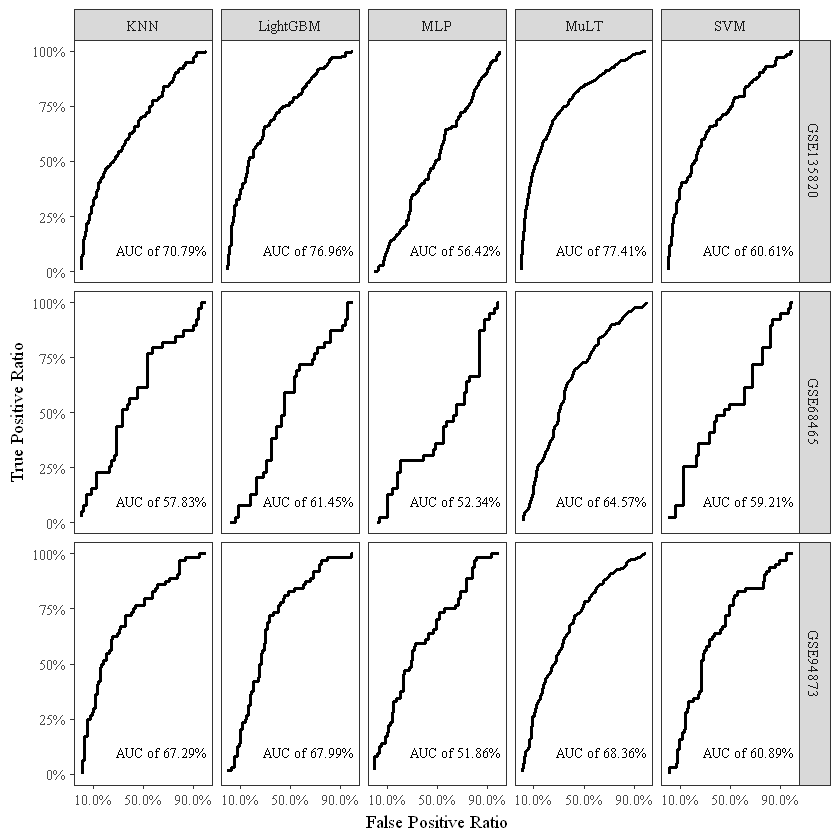

In [21]:
library(ggplot2)
library(dplyr)
library(MESS)

simple_roc <- function(labels, scores) {
  labels <- labels[order(scores, decreasing=TRUE)]
  list(data.frame(TPR=cumsum(labels)/sum(labels), FPR=cumsum(!labels)/sum(!labels), labels))
}

rrr <- NULL

for (k1 in names(result_list)) {
    
    print(k1)
    
    for (k2 in names(result_list[[k1]])) {
        
        y_hat = result_list[[k1]][[k2]]['y_hat']
        result_list[[k1]][[k2]]['y_hat'] = (y_hat - min(y_hat)) / (max(y_hat) - min(y_hat))
        
        a <- result_list[[k1]][[k2]] %>% group_by(fold) %>% summarize(roc = simple_roc(y, (y_hat - min(y_hat)) / (max(y_hat) - min(y_hat))))

        final_df = data.frame()

        for (i in a$roc) {
            
          i['INDEX'] = 1:nrow(i)

          final_df <- rbind(final_df, i)
        }

        final_df <- as.data.frame(cbind(
              aggregate(TPR ~ INDEX, final_df, mean)$TPR,
              aggregate(TPR ~ INDEX, final_df, sd)$TPR,
              aggregate(FPR ~ INDEX, final_df, mean)$FPR,
              aggregate(FPR ~ INDEX, final_df, sd)$FPR))

        colnames(final_df) <- c('TPR.mean', 'TPR.sd', 'FPR.mean', 'FPR.sd')

        final_df$dataset <- k1

        final_df$method <- k2
        
        if (is.null(rrr)) {
            rrr <- final_df
        } else {
            rrr <- rbind(rrr, final_df)
        }
    }
}

final_df <- rrr

final_df[is.na(final_df)] <- 0

l <- df

p <- 
  ggplot(final_df, aes(FPR.mean, TPR.mean)) + 
  geom_line(size=1.) +
  xlab('False Positive Ratio') + 
  ylab('True Positive Ratio') +
  ylim(0, 1) +
  facet_grid(dataset ~ method) +
  geom_label(aes(x=.65, y=.1, label=paste0('AUC of ', round(l$valid_auc, 4) * 100, '%', sep='')), 
             data=l, inherit.aes = F, size=3, family='serif', fill = "transparent", label.size = NA) +
  scale_x_continuous(labels = scales::percent, breaks = c(.1, .5, .9)) +
  scale_y_continuous(labels = scales::percent) +
  theme_bw() +
  theme(text=element_text(size=11, family='serif'), panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), panel.background = element_blank())

ggsave('images/auc.pdf', p, units='cm', width=18, height=12)

p

In [ ]:
df.mult = read.csv('output/mult/mult_metrics.csv', header=T)
df.mult$method = 'MuLT'

df.knn = read.csv('output/smla/knn/knn_metrics.csv', header=T)
df.knn$X <- NULL
df.knn$predictor <- NULL
df.knn$method = 'KNN'

df.mlp = read.csv('output/smla/mlp/mlp_metrics.csv', header=T)
df.mlp$X <- NULL
df.mlp$predictor <- NULL
df.mlp$method = 'MLP'

# df.svm = read.csv('output/smla/svm/svm_metrics.csv', header=T)
# df.svm$X <- NULL
# df.svm$predictor <- NULL
# df.svm$method = 'SVM'

# df <- rbind(df.mult, df.knn, df.mlp, df.svm)
df <- rbind(df.mult, df.knn, df.mlp)

head(df)

In [ ]:
s <- df %>% group_by(dataset, method) %>% summarize(valid_auc=mean(valid_auc))

p <- ggplot(s, aes(method, valid_auc)) + 
     geom_bar(stat='identity') +
     theme_bw() +
     theme(
         # axis.ticks.x=element_blank(), 
         # axis.text.x=element_blank(), 
         legend.position='none',
     ) + 
     # xlab(NULL) + 
     ylab('AUC') +
     # scale_fill_grey(name='Method') + 
     scale_y_continuous(labels = scales::percent) +
     facet_grid(. ~ dataset, scales='free')

options(repr.plot.width=8, repr.plot.height=2)

ggsave('images/auc_boxplot.pdf', p, units='cm', height=5, width=18)

p

In [ ]:
df %>% group_by(dataset, method) %>% summarize(valid_auc=mean(valid_auc))

In [ ]:
options(repr.plot.width=4, repr.plot.height=4)
x = c(77, 62, 68) / c(71, 54, 67) - 1
y=c(.38166, .28927, .49375)
plot(x=x, y=y)